Data from https://www.kaggle.com/datasets/willianoliveiragibin/countries-poluation

One of the primary indicators used to assess air quality is the Air Quality Index (AQI), a numerical scale that quantifies the concentration of pollutants in the air. The major pollutants considered in AQI calculations include particulate matter (PM10 and PM2.5), nitrogen dioxide (NO2), sulfur dioxide (SO2), carbon monoxide (CO), and ozone (O3). By evaluating these pollutants, experts can gauge the potential health risks associated with breathing the air in a specific location.

We analyze the trend of the averge AQI (average defined as across different cities in the country) for different countries. We also compare the average AQI for the five countries with the most data collected to the average across all data

Techniques involved:
1. Data cleaning
2. Simple EDA using pandas
3. Data visualization using seaborn and matplotlib

In [211]:
# 1. Load the necessary libraries

%matplotlib inline
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
# 2. Using pandas to read the spreadsheet and its basic information

df=pd.read_csv('air_pollution_new.csv')
print(df.info(),"\n") # Print some basic information for the data set

df.head(5) # Print the first 5 rows for an overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     6985 non-null   object
 1   country  6985 non-null   object
 2   2017     6985 non-null   object
 3   2018     6985 non-null   object
 4   2019     6985 non-null   object
 5   2020     6985 non-null   object
 6   2021     6985 non-null   object
 7   2022     6985 non-null   object
 8   2023     6985 non-null   object
dtypes: object(9)
memory usage: 491.3+ KB
None 



,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13.0,11.0,8.8,8.7


In [213]:
# 3.1 Before data cleaning - Data investigation for mismatching data

# The value for API is not stored in numeric form, we change it to float32 type
cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# I removed the the error message by commenting this line! You can remove # to see the error
# df[cols] = df[cols].apply(pd.to_numeric) 

# Let's see what happens there and where one of them happens!

i, c =np.where(df == "12.899.999.999.999.900") 
print(df.iloc[i, c])

# Clearly, the data set has some strange strings, which cannot be detected in the first cell if everything is stored in 'object'

                        2017
2457  12.899.999.999.999.900


In [214]:
# 3.2 Data cleaning - Remove all strange elements

# The value for API is not stored in numeric form, we change it to float32 type
cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df.info() # Let's see what happens now!

# We only have 6975 non-null count for the column '2017'. The missing 10 are due to the strange strings we showed above!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     6985 non-null   object 
 1   country  6985 non-null   object 
 2   2017     6975 non-null   float64
 3   2018     6975 non-null   float64
 4   2019     6971 non-null   float64
 5   2020     6970 non-null   float64
 6   2021     6944 non-null   float64
 7   2022     6913 non-null   float64
 8   2023     6921 non-null   float64
dtypes: float64(7), object(2)
memory usage: 491.3+ KB


In [215]:
# 4.1 Exploratory Data Analysis - Across all countries in the data set

# Some entries are 0 which correspond to no data collected. 
# These entries should be excluded in calculating the average

df_cor = df.replace(0, np.NaN) # Replace those zero to NaN
df_cor.describe().round(2) # A quick overview of the AQI statistics, round up to 2 dp

,2017,2018,2019,2020,2021,2022,2023
count,2123.00,2294.00,3634.00,3845.00,6158.00,6913.00,6921.00
mean,18.00,17.43,14.66,14.32,14.11,12.77,12.76
std,17.15,15.87,12.52,11.39,11.18,10.78,10.83
min,1.90,2.20,1.90,2.20,1.50,0.20,0.30
25%,8.70,8.70,7.60,8.10,8.00,7.00,7.00
50%,11.80,11.90,10.60,10.30,10.50,9.40,9.30
75%,18.75,19.00,15.50,16.10,16.00,14.20,14.20
max,145.60,135.80,110.20,110.20,175.90,97.40,97.40


In [216]:
# 4.2 Exploratory Data Analysis - The five countries with the most data: USA, Japan, China, Canada, Germany

df_US=df_cor[df_cor['country']=='USA']
df_JP=df_cor[df_cor['country']=='Japan']
df_CN=df_cor[df_cor['country']=='China']
df_CA=df_cor[df_cor['country']=='Canada']
df_DE=df_cor[df_cor['country']=='Germany']

# Calculate the average AQI of the cities in the five countries
# Some columns contain strings, so we add 'numeric_only'=True
mean_US=df_US.mean(numeric_only=True).rename('USA')
mean_JP=df_JP.mean(numeric_only=True).rename('Japan')
mean_CN=df_CN.mean(numeric_only=True).rename('China')
mean_CA=df_CA.mean(numeric_only=True).rename('Canada')
mean_DE=df_DE.mean(numeric_only=True).rename('Germany')

mean_big5 = pd.concat([mean_US, mean_JP, mean_CN, mean_CA, mean_DE],axis=1, join='inner').round(2).reset_index()
mean_big5.rename(columns = {'index':'years'}, inplace=True)

# Let us also add the average values and from all countries obtained above
mean_big5.loc[:, "all"] = [18.00, 17.43, 14.66, 14.32, 14.11, 12.77, 12.76]

print(mean_big5) 

  years    USA  Japan  China  Canada  Germany    all
0  2017   8.93  11.84  43.66    6.65    12.54  18.00
1  2018   8.63  11.80  38.78    7.33    13.22  17.43
2  2019   7.94  11.15  36.15    6.82    10.90  14.66
3  2020  10.34   9.74  32.77    6.65     9.40  14.32
4  2021  10.29   8.96  30.34    8.42     9.99  14.11
5  2022   7.77   9.01  29.35    6.69     9.87  12.77
6  2023   7.72   8.99  29.27    6.68     9.82  12.76


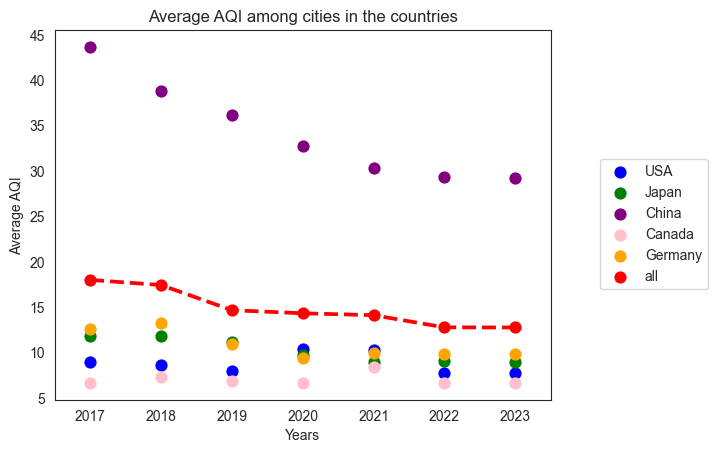

In [217]:
# 4.3 Data visualization

# Reshape the DataFrame from wide to long facilitate seaborn lineplot
plot_mean=mean_big5.melt('years', var_name='countries', value_name='vals')

sns.set_style("white")
color=['blue', 'green', 'purple', 'pink', 'orange','red']
ax=sns.pointplot(x='years', y='vals', hue='countries', data=plot_mean, palette=color,linestyles=['','','','','','--'])
ax.set(title='Average AQI among cities in the countries')

# Set labels and limits
plt.xlabel('Years')
plt.ylabel('Average AQI')
plt.legend(bbox_to_anchor=(1.1, 0.65), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()

# Result: Most of the countries we have analyzed have better AQI than the average